# Content Table

1. [Introduction](#Introduction)


2. [The Data](#The-Data)
    

3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

    
4. [Modelling](#Modelling)    
    
    2.1. [Data Preprocessing](#Data-Preprocessing)
    
    2.2. [Carbon Monoxide](#Carbon-Monoxide)
      
    2.3. [Carbon Monoxide with Important Features](#Carbon-Monoxide-with-Important-Features)
    
    2.4. [Nitric Oxides](#Nitric-Oxides)
    
    2.5. [Nitric Oxides with Important Features](#Nitric-Oxides-with-Important-Features)

      
5. [Results](#Results)


6. [References](#References)

# Introduction

When we hear the word turbine, usually, airplanes are the first thing that comes to our minds, however, the power generating industry also uses turbines to generate power.
Power is generated when the turbine shaft, which is connected to an electric generator, starts rotating thanks to the transformation of chemical energy into mechanical energy that happens inside the turbine.

The first stage of the turbine compresses air, which is the mixed with, in most cases, natural gas to create an explosion, this explosion generates really high amounts of heat and pressure, where this pressure helps spin the blades connected to the shaft.

A lot of variables come into play to have an efficient combustion and energy transfer, some ambient variables as ambient temperature, pressure and humidity as well as process variables like the inlet temperature and pressure of the gasses.

Once the combustion has happened, exhaust gases are generated, these exhaust gasses contain pollutants.  In the EU and in most parts of the world, carbon monoxide (CO) and nitric oxides (NOx) emissions are regulated for power generating plants. In the EU these two emissions are limited to 25ppm when natural gas is used as fuel (Fichet et al, 2010, pp. 1)

This report will examine data from a gas turbine generation plant from the years 2011 to 2015, to see if the process variables have a relationship with the emission gasses and see if it’s possible to predict them. 


# The Data

The data was extracted from the UCI Machine Learning Repository.  It contains 5 files of data from a gas-powered turbine in Turkey.  Each file consists of a different year’s reading, ranging from 2011 to 2015. All the files have the same columns, which were combined to form a general table of 36733 rows and 11 columns, the column names of the data set can be read on the following table:

| Column Name |               Meaning           |  Dimension  |
| :----------- |            :------------:         | ----------- |
|      AT     |   Ambien Temperature            |   Celcius   |
|      AP     |   Ambuent Pressure              |     mbar    |
|      AH     |   Ambient Humidity              |      %      |
|     AFDP    |Air Filter Differential Pressure |     mbar    |
|     GTEP    | Gas Turbine Exhaust Pressure    |     mbar    |
|      TIT    | Turbine Inlet Temperature       |   Celcius   |
|      TAT    | Turbine After Temperature       |   Celcius   |
|      TEY    | Turbine Energy Yield            |     MWh     |
|      CDP    | Compressor Discharge Pressure   |     mbar    |
|      CO     | CO emissions                    |    mg/m3    |
|      NOX    | NOx emissions                   |    mg/m3    |

# Exploratory Data Analysis

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [229]:
column_names = ['Ambient temp','Ambient press','Ambient humid','Air filter diff press','Gas turbine exhaust press','Turbine inlet temp','Turbine after temp','Turbine energy yield','Compressor discharge press','CO','NOx']
#Read the data
df2011 = pd.read_csv('gt_2011.csv', names = column_names, skiprows=1)
df2012 = pd.read_csv('gt_2012.csv', names = column_names, skiprows=1)
df2013 = pd.read_csv('gt_2013.csv', names = column_names, skiprows=1)
df2014 = pd.read_csv('gt_2014.csv', names = column_names, skiprows=1)
df2015 = pd.read_csv('gt_2015.csv', names = column_names, skiprows=1)
#Add a column with the year for ease of identification
df2011['YEAR'] = 2011
df2012['YEAR'] = 2012
df2013['YEAR'] = 2013
df2014['YEAR'] = 2014
#Concatenate all years but 2015, as we will use this year as test data
df = pd.concat([df2011,df2012,df2013,df2014])
df = df.reset_index(drop=True)

In [230]:
df.head()

,Ambient temp,Ambient press,Ambient humid,Air filter diff press,Gas turbine exhaust press,Turbine inlet temp,Turbine after temp,Turbine energy yield,Compressor discharge press,CO,NOx,YEAR
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29349 entries, 0 to 29348
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ambient temp                29349 non-null  float64
 1   Ambient press               29349 non-null  float64
 2   Ambient humid               29349 non-null  float64
 3   Air filter diff press       29349 non-null  float64
 4   Gas turbine exhaust press   29349 non-null  float64
 5   Turbine inlet temp          29349 non-null  float64
 6   Turbine after temp          29349 non-null  float64
 7   Turbine energy yield        29349 non-null  float64
 8   Compressor discharge press  29349 non-null  float64
 9   CO                          29349 non-null  float64
 10  NOx                         29349 non-null  float64
 11  YEAR                        29349 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 2.7 MB


In [232]:
df.describe()

,Ambient temp,Ambient press,Ambient humid,Air filter diff press,Gas turbine exhaust press,Turbine inlet temp,Turbine after temp,Turbine energy yield,Compressor discharge press,CO,NOx,YEAR
count,29349.000000,29349.000000,29349.000000,29349.00000,29349.000000,29349.000000,29349.000000,29349.000000,29349.000000,29349.000000,29349.000000,29349.000000
mean,17.835369,1012.708137,80.186589,4.00769,25.421312,1082.045341,546.036755,133.383884,12.051342,2.181882,66.652312,2012.478960
std,7.270248,6.298584,13.742408,0.78893,4.110938,16.874589,7.137500,15.472271,1.076259,2.229464,11.416217,1.114635
min,0.289850,985.850000,25.987000,2.08740,17.878000,1000.800000,511.040000,100.030000,9.851800,0.000388,27.183000,2011.000000
25%,11.972000,1008.600000,71.069000,3.48890,23.114000,1072.200000,544.720000,123.740000,11.423000,1.082200,59.298000,2011.000000
50%,17.888000,1012.300000,83.231000,4.01190,25.079000,1086.600000,549.900000,133.750000,11.968000,1.561900,64.964000,2012.000000
75%,23.661000,1016.600000,91.020000,4.44120,26.984000,1095.100000,550.050000,139.590000,12.474000,2.389700,72.674000,2013.000000
max,34.929000,1034.200000,100.200000,7.61060,37.402000,1100.900000,550.610000,174.610000,15.081000,44.103000,119.910000,2014.000000


<AxesSubplot:>

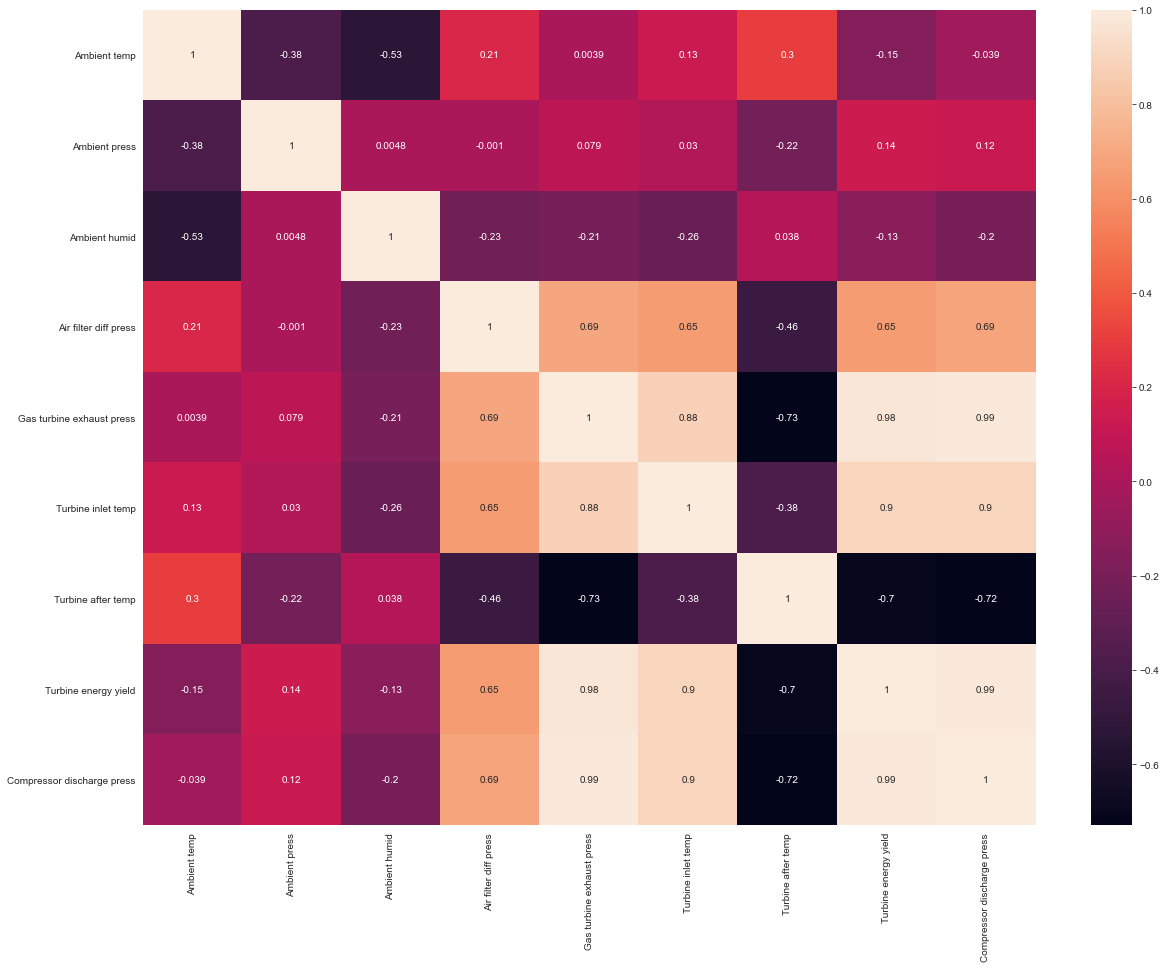

In [233]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr().loc[:'Compressor discharge press', :'Compressor discharge press'], annot=True)

We can observe that Compressor Discharge Pressure is highly correlated to Turbine Exhaust Pressure and Turbine Energy Yield.

However, as we will use Random Forest Regressor, it is not affected by this as much as models like Linear Regression as it picks different sets of attributes for each model (as its an ensemble model) and different models will use different configurations.

We will look at the feature importance and perhaps derive a new model from there.

In [234]:
df.corr()[['CO','NOx']].loc['Ambient temp':'Compressor discharge press',:]

,CO,NOx
Ambient temp,-0.109957,-0.579915
Ambient press,0.007476,0.228684
Ambient humid,0.174745,0.106019
Air filter diff press,-0.389493,-0.187236
Gas turbine exhaust press,-0.534600,-0.145080
Turbine inlet temp,-0.698777,-0.156808
Turbine after temp,0.058805,-0.114061
Turbine energy yield,-0.571361,-0.041949
Compressor discharge press,-0.548554,-0.101975


Text(0, 0.5, 'CO - mg/m^3')

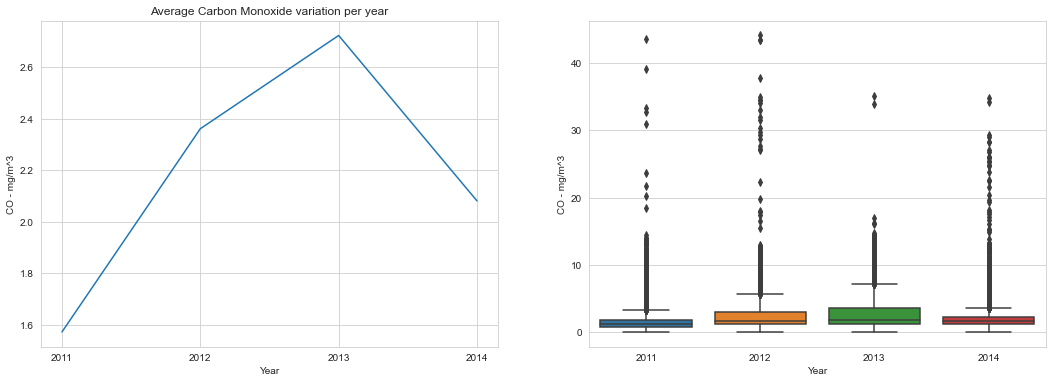

In [235]:
fig, axs = plt.subplots(ncols=2, figsize=(18,6))
df.groupby(['YEAR']).mean()['CO'].plot(grid=True, xticks=(2011, 2012, 2013, 2014), title='Average Carbon Monoxide variation per year', ax=axs[0])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("CO - mg/m^3")

sns.boxplot(x='YEAR', y='CO', data=df, ax=axs[1])
axs[1].set_xlabel("Year")
axs[1].set_ylabel("CO - mg/m^3")

For carbon monoxide, the 25ppm emission limit is equivalent to 31mg/m^3 , even though on average, carbon monoxide emissions stay within the limits throughout the years, it is clear to see in Figure 2 that some of the outliers are beyond the regulations.

Text(0, 0.5, 'NOx - mg/m^3')

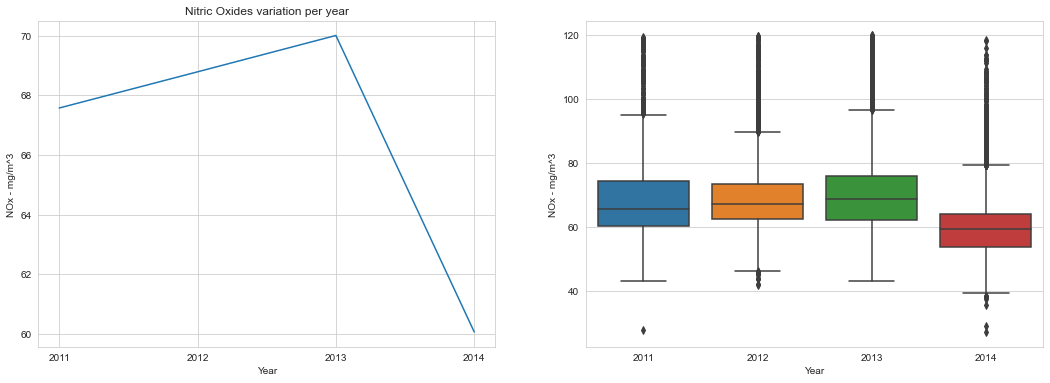

In [236]:
fig, axs = plt.subplots(ncols=2, figsize=(18,6))
df.groupby(['YEAR']).mean()['NOx'].plot(grid=True, xticks=(2011, 2012, 2013, 2014), title='Nitric Oxides variation per year', ax=axs[0])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("NOx - mg/m^3")

sns.boxplot(x='YEAR', y='NOx', data=df, ax=axs[1])
axs[1].set_xlabel("Year")
axs[1].set_ylabel("NOx - mg/m^3")

For Nitric Oxides, 25ppm is equivalent to 52mg/m^3, so we can see that Nitrix Oxides are way above the emission regulations limit.

Martien and Bahlmann (1994, pp. 7) state that nitric oxides emissions decrease with higher ambient temperature, we can clearly confirm this on the NOx correlation table above, however ambient temperature is a variable that we cannot control.

# Modelling

In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV 

We will perform a Random Forest Regression, as this is an ensemble model, this should be a somewhat robust and its also a "white box" model, which will let us see what attributes influence the most in the CO and NOx generation.

## Data Preprocessing

### Train Data

In [245]:
X = df.loc[:,'Ambient temp':'Compressor discharge press']
y_CO = df['CO']
y_NOx = df['NOx']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

### Test Data

In [247]:
X_test = df2015.loc[:,'Ambient temp':'Compressor discharge press']
y_test_CO = df2015['CO']
y_test_NOx = df2015['NOx']

scaled_test = scaler.transform(X_test)

## Carbon Monoxide

In [250]:
model = RandomForestRegressor()
parameters = {'n_estimators': [80,100,110],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [2,4,5],
              'max_features': ['auto', 'sqrt', 'log2']
             }

search = GridSearchCV(model, param_grid=parameters, cv=5, scoring='neg_root_mean_squared_error', n_jobs = -1, verbose=10)
result = search.fit(scaled_data, y_CO)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [251]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -1.3906424701867799
Best Hyperparameters: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 110}


In [252]:
RFR_CO = RandomForestRegressor(bootstrap = True, max_features = 'sqrt', min_samples_leaf = 5, min_samples_split = 3, n_estimators = 110)
RFR_CO.fit(scaled_data, y_CO)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=3, n_estimators=110)

### Predicting CO

In [257]:
CO_predictions = RFR_CO.predict(scaled_test)
print('RMSE CO:', np.sqrt(mean_squared_error(y_test_CO, CO_predictions)))

RMSE CO: 1.4717373383792356


Text(0.5, 0, '')

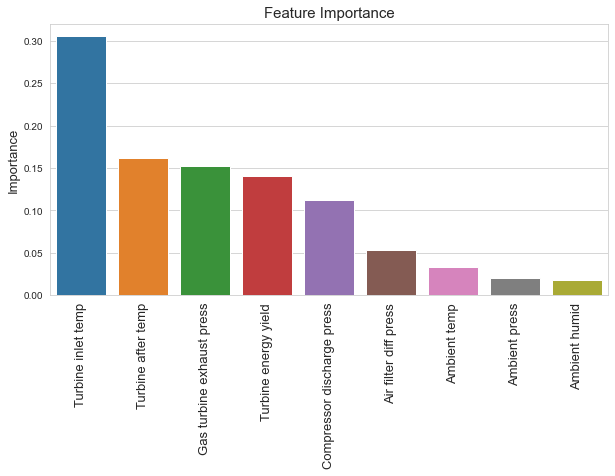

In [253]:
importance = RFR_CO.feature_importances_
weights = pd.Series(importance, index=X.columns.values)
importance_df = pd.DataFrame(data={'Attribute':X.columns, 'Importance':weights})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical', fontsize=13)
sns.barplot(x = 'Attribute', y = 'Importance', data = importance_df)
plt.title('Feature Importance', fontsize=15)
plt.ylabel('Importance', fontsize=13)
plt.xlabel('')

We can see Turbine Inlet Temperature is the most important feature when predicting CO values.  We will make a new model with all features with importance above 10%.

## Carbon Monoxide with Important Features

In [262]:
X_importance_CO = df[['Gas turbine exhaust press','Turbine inlet temp','Turbine after temp','Turbine energy yield','Compressor discharge press']]
scaler_importance_CO = StandardScaler()
scaled_importance_CO = scaler_importance_CO.fit_transform(X_importance_CO)

model = RandomForestRegressor()
parameters = {'n_estimators': [80,100,110],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [2,4,5],
              'max_features': ['auto', 'sqrt', 'log2']
             }

search = GridSearchCV(model, param_grid=parameters, cv=5, scoring='neg_root_mean_squared_error', n_jobs = -1, verbose=10)
result = search.fit(scaled_importance_CO, y_CO)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [263]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -1.37262590815511
Best Hyperparameters: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 110}


In [412]:
RFR_CO_important = RandomForestRegressor(max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 110)
RFR_CO_important.fit(scaled_importance_CO, y_CO)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=110)

### Predictions important features - CO

In [413]:
X_test_important_CO = df2015[['Gas turbine exhaust press','Turbine inlet temp','Turbine after temp','Turbine energy yield','Compressor discharge press']]
scaled_test_important_CO = scaler_importance_CO.transform(X_test_important_CO)

CO_predictions_important = RFR_CO_important.predict(scaled_test_important_CO)
print('RMSE CO:', np.sqrt(mean_squared_error(y_test_CO, CO_predictions_important)))

RMSE CO: 1.4945064141379694


In [302]:
from sklearn.decomposition import PCA

In [303]:
#Compare real data to predicted data on a graph
data2015 = PCA(n_components=1).fit(X_test)
pca_1d = data2015.transform(X_test)

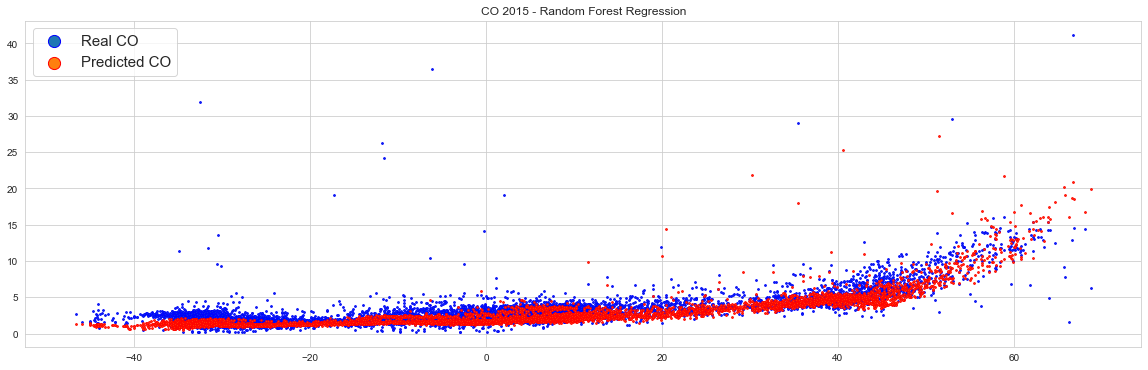

In [306]:
#CO 2015 real vs predicted - Linear Regression
f, (ax1) = plt.subplots(1, sharey=True,figsize=(20,6))
ax1.set_title('CO 2015 - Random Forest Regression')
a = ax1.scatter(pca_1d[:,0],y_test_CO, s=3, edgecolors='blue')
b = ax1.scatter(pca_1d[:,0],CO_predictions_important, s=3, edgecolors='red')
ax.set_xlabel('1D Variables')
ax.set_ylabel('CO levels')
plt.legend([a, b], ['Real CO','Predicted CO'], prop={'size': 15}, markerscale=7)

## Nitric Oxides

In [307]:
model = RandomForestRegressor()
parameters = {'n_estimators': [50,80,100,110],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [2,4,5],
              'max_features': ['auto', 'sqrt', 'log2'],
             }

search = GridSearchCV(model, param_grid=parameters, cv=5, scoring='neg_root_mean_squared_error', n_jobs = -1, verbose=10)
result = search.fit(scaled_data, y_NOx)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [308]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -7.424028321657599
Best Hyperparameters: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [309]:
RFR_NOx = RandomForestRegressor(max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100)
RFR_NOx.fit(scaled_data, y_NOx)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=105)

### Predicting NOx

In [310]:
NOx_predictions = RFR_NOx.predict(scaled_test)
print('RMSE NOx:', np.sqrt(mean_squared_error(y_test_NOx, NOx_predictions)))

RMSE NOx: 10.265302607641434


Text(0.5, 0, '')

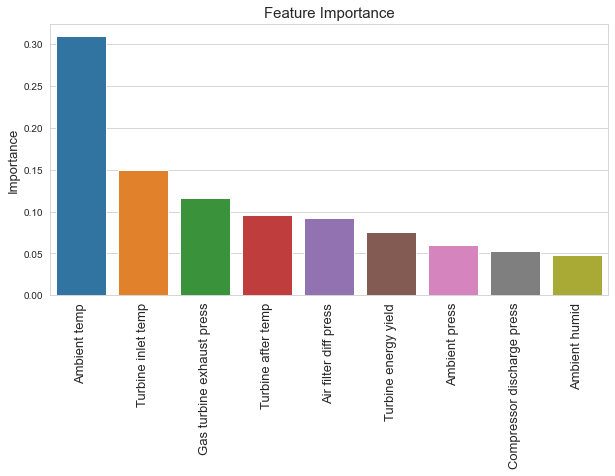

In [311]:
importance = RFR_NOx.feature_importances_
weights = pd.Series(importance, index=X.columns.values)
importance_df = pd.DataFrame(data={'Attribute':X.columns, 'Importance':weights})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical', fontsize=13)
sns.barplot(x = 'Attribute', y = 'Importance', data = importance_df)
plt.title('Feature Importance', fontsize=15)
plt.ylabel('Importance', fontsize=13)
plt.xlabel('')

As referenced above by Martien and Bahlmann (1994, pp. 7), nitric oxides emissions are highly dependent on ambient temperature.

We will fit a model with attributes Ambient Temperature through Turbine Energy Yield.

## Nitric Oxides with Important Features

In [368]:
X_importance_NOx = df[['Ambient temp','Air filter diff press','Gas turbine exhaust press','Turbine inlet temp','Turbine after temp','Turbine energy yield']]
scaler_importance_NOx = StandardScaler()
scaled_importance_NOx = scaler_importance_NOx.fit_transform(X_importance_NOx)

In [313]:
X_importance_NOx = df[['Ambient temp','Air filter diff press','Gas turbine exhaust press','Turbine inlet temp','Turbine after temp','Turbine energy yield']]
scaler_importance_NOx = StandardScaler()
scaled_importance_NOx = scaler_importance_NOx.fit_transform(X_importance_NOx)

model = RandomForestRegressor()
parameters = {'n_estimators': [80,100,110],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [2,4,5],
              'max_features': ['auto', 'sqrt', 'log2']
             }

search = GridSearchCV(model, param_grid=parameters, cv=5, scoring='neg_root_mean_squared_error', n_jobs = -1, verbose=10)
result = search.fit(scaled_importance_NOx, y_NOx)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [314]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -7.8847972325619695
Best Hyperparameters: {'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [374]:
RFR_NOx_important = RandomForestRegressor(max_features = 'log2', min_samples_leaf = 5, min_samples_split = 2, n_estimators = 100)
RFR_NOx_important.fit(scaled_importance_NOx, y_NOx)

RandomForestRegressor(max_features='log2', min_samples_leaf=5)

### Predictions important features - NOx

In [375]:
X_test_important_NOx = df2015[['Ambient temp','Air filter diff press','Gas turbine exhaust press','Turbine inlet temp','Turbine after temp','Turbine energy yield']]
scaled_test_important_NOx = scaler_importance_NOx.transform(X_test_important_NOx)

NOx_predictions_important = RFR_NOx_important.predict(scaled_test_important_NOx)
print('RMSE NOx:', np.sqrt(mean_squared_error(y_test_NOx, NOx_predictions_important)))

RMSE NOx: 9.588246478811966


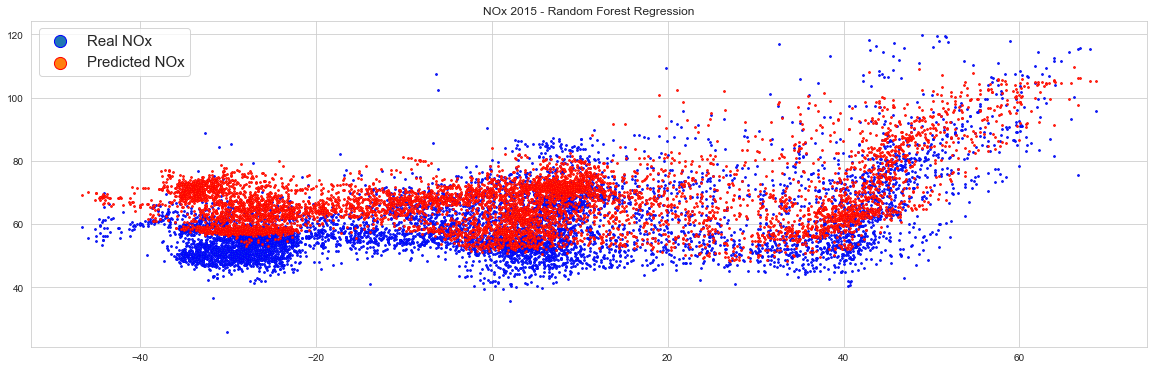

In [376]:
#NOx 2015 real vs predicted
f, (ax1) = plt.subplots(1, sharey=True,figsize=(20,6))
ax1.set_title('NOx 2015 - Random Forest Regression')
a = ax1.scatter(pca_1d[:,0],y_test_NOx, s=3, edgecolors='blue')
b = ax1.scatter(pca_1d[:,0],NOx_predictions_important, s=3, edgecolors='red')
ax.set_xlabel('1D Variables')
ax.set_ylabel('CO levels')
plt.legend([a, b], ['Real NOx','Predicted NOx'], prop={'size': 15}, markerscale=7)

# Results

| Gas | RMSE Full Model | RMSE Important Features |
| --- | :-------------: | :---------------------: |
| CO  |       1.471     |          1.494          |
| NOx |      10.265     |          9.588          |

We can observe that for Carbon Monoxide, picking the important features according to the Random Forest Regressor did not really help improve the model.

For Nitric Oxides, selecting important features seemed to improve somewhat the model.  This should still be treated carefully, as the random nature of the Random Forests, each time the model is fit the results can vary usually by some decimals, so this improvement could also have been somewhat lucky (although I fit the model a few times and the RMSE with just important features never went above 10).

Although the results for Carbon Monoxide seem low, the mean CO emissions is 2.18 (through all the years), so we can see this is not a good result. If the model would to be improved, it could still be used carefully as on average most CO emissions (2.18mg/m^3) were way below the regulation limit (31mg/m^3).  CO seems to have no problems.

In the Nitric Oxides case, the RMSE is relatively lower in relation to the mean NOx emissions through the year, compared to CO, however, as on average the emissions for NOx above the regulation limits (66.66 mg/m^3 average with regulation limit of 52mg/m^3) this should be treated extremely carefully.

# References

Fichet, V, Kanniche, M, Plion, P & Gicquel, O 2010, ‘A reactor network model for prediction NOx emissions in gas turbines’, FUEL: The Science and Technology of Fuel and Energy, vol. 89, no. 9, pp. 2202-2210.

Hung, W 1992, ‘Carbon Monoxide Emissions from Gas Turbines as Influenced by Ambient Temperature and Turbine Load’, ASME Journal of Engineering for Gas Turbines and Power, Vol. 115, no. 3, pp. 588-593.

Martien, B & Bahlmann, F 1994, ‘Variations in the NOx emission of gas turbines: effects of are temperature, air humidity and natural gas composition’, ASME 1994 International Gas Turbine and Aeroengine Congress and Exposition, The Hague, Netherlands, 13-16 June, 1994.
